<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# imports

import pandas as pd 
import numpy as np
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
#bringing in our 4 dataframes 

In [3]:
public_data = pd.read_csv("COVID-19_Aggregate_Cases_Current_Weekly_County_Health.csv")

In [4]:
google_data_2020 = pd.read_csv("2020_sub_region_1_daily_2020_US_Pennsylvania_daily_symptoms_dataset.csv",  dtype=str)
#google_data_2020.head()

In [5]:
google_data_2021 = pd.read_csv("2021_sub_region_1_daily_2021_US_Pennsylvania_daily_symptoms_dataset(1).csv", dtype=str)
#google_data_2021["sub_region_2"].nunique()

In [6]:
google_data_2022 = pd.read_csv("2022_sub_region_1_daily_2022_US_Pennsylvania_daily_symptoms_dataset(1).csv", dtype=str)
#google_data_2022

In [7]:
# combining all our google data into one dataframe
google_dataframes = [google_data_2020, google_data_2021, google_data_2022]
google_data = pd.concat(google_dataframes)
google_data.head()

,country_region_code,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
0,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-01,2.37,4.85,...,1.22,0.24,0.34,3.29,0.38,2.49,0.35,0.16,0.47,0.38
1,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-02,2.28,4.74,...,1.34,0.24,0.4,3.39,0.38,2.4,0.4,0.16,0.53,0.45
2,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-03,2.04,4.62,...,1.23,0.23,0.38,3.17,0.34,2.19,0.38,0.16,0.51,0.41
3,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-04,2.25,4.83,...,1.22,0.26,0.4,3.15,0.32,2.46,0.39,0.17,0.54,0.35
4,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-05,2.5,4.7,...,1.19,0.25,0.37,3.38,0.34,2.5,0.38,0.16,0.53,0.36


In [8]:
google_data.drop(columns=google_data.columns[0:4], inplace=True)
google_data.head()

,sub_region_2,sub_region_2_code,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
0,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-01,2.37,4.85,8.27,0.25,0.91,0.1,...,1.22,0.24,0.34,3.29,0.38,2.49,0.35,0.16,0.47,0.38
1,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-02,2.28,4.74,8.33,0.31,0.93,0.1,...,1.34,0.24,0.4,3.39,0.38,2.4,0.4,0.16,0.53,0.45
2,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-03,2.04,4.62,7.79,0.29,0.95,0.1,...,1.23,0.23,0.38,3.17,0.34,2.19,0.38,0.16,0.51,0.41
3,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-04,2.25,4.83,8.38,0.25,0.89,0.09,...,1.22,0.26,0.4,3.15,0.32,2.46,0.39,0.17,0.54,0.35
4,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-05,2.5,4.7,8.4,0.25,0.8,0.09,...,1.19,0.25,0.37,3.38,0.34,2.5,0.38,0.16,0.53,0.36


In [9]:
google_data['date']= pd.to_datetime(google_data['date'])
#google_data['date']

In [10]:
# make the date our index, then sort by the date index
google_data.set_index('date', inplace=True)
sorted_google_data = google_data.sort_index()

In [11]:
sorted_google_data

,sub_region_2,sub_region_2_code,place_id,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,symptom:Ageusia,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2.37,4.85,8.27,0.25,0.91,0.1,0.04,...,1.22,0.24,0.34,3.29,0.38,2.49,0.35,0.16,0.47,0.38
2020-01-01,Wayne County,42127,ChIJi2kzXE6xxIkR6haLl-5Z1KY,NaN,5.07,6.33,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.53,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,McKean County,42083,ChIJXWzIq8TBzYkRpK8OyuDlIi8,NaN,4.31,8.11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,Carbon County,42025,ChIJUclpSMyxxYkReO80rzNlIyE,2.75,3.91,7.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.8,NaN,1.8,NaN,NaN,NaN,NaN
2020-01-01,Potter County,42105,ChIJYUDex5jnzYkRV-hIg0hwTPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,Monroe County,42089,ChIJo1Dq5_-NxIkRf4gUnFVPgUI,1.3,5.49,6.93,NaN,NaN,NaN,NaN,...,1.35,NaN,NaN,3.9,NaN,2.63,NaN,NaN,0.78,NaN
2022-11-13,Montgomery County,42091,ChIJ6yayVjmcxokRvV1Q-SKqC0s,1.36,3.92,6.1,0.24,0.69,0.12,0.11,...,0.92,0.14,0.43,2.46,0.27,2.16,0.39,0.17,0.41,0.3
2022-11-13,Montour County,42093,ChIJgTHtyUJwz4kRXELxvBdMJSc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# lets check for missing dates - starting with Philly
google_philly= sorted_google_data[sorted_google_data.sub_region_2 == 'Philadelphia County']


In [13]:
google_philly

,sub_region_2,sub_region_2_code,place_id,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,symptom:Ageusia,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2.35,4.46,7.76,0.19,0.62,0.09,NaN,...,1.09,0.2,0.31,2.95,0.32,2.55,0.31,0.19,0.37,0.25
2020-01-02,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2.37,4.17,8.13,0.24,0.66,0.05,NaN,...,1.14,0.19,0.37,3.01,0.27,2.63,0.34,0.14,0.5,0.34
2020-01-03,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2.13,4.18,7.57,0.24,0.78,0.07,0.06,...,1.08,0.17,0.32,2.95,0.29,2.46,0.3,0.18,0.51,0.3
2020-01-04,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2.37,4.5,8.85,0.16,0.69,0.09,NaN,...,1.1,0.18,0.37,3.26,0.28,2.78,0.42,0.24,0.48,0.27
2020-01-05,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2.36,4.12,8.58,0.07,0.62,0.07,NaN,...,1.12,0.21,0.28,3.21,0.25,2.82,0.35,0.2,0.49,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,1.34,3.44,6.12,0.29,0.62,0.07,0.09,...,1.05,0.22,0.36,2.62,0.38,2.12,0.34,0.19,0.45,0.31
2022-11-10,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,1.41,3.45,6.24,0.21,0.59,0.14,0.07,...,1.01,0.2,0.38,2.6,0.28,2.06,0.35,0.13,0.39,0.27
2022-11-11,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,1.33,3.56,6.3,0.24,0.47,0.1,0.1,...,0.97,0.24,0.35,2.51,0.35,2.03,0.42,0.14,0.44,0.28


In [14]:
#https://stackoverflow.com/questions/52044348/check-for-any-missing-dates-in-the-index
#checks for any missing dates! 
outcome = pd.date_range(start = '2020-01-01', end = '2022-11-13' ).difference(google_philly.index)

In [15]:
outcome

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [16]:
google_counties = sorted_google_data['sub_region_2'].unique()
google_counties

array([nan, 'Wayne County', 'McKean County', 'Carbon County',
       'Potter County', 'Fulton County', 'Mifflin County', 'Adams County',
       'Bradford County', 'Cumberland County', 'Juniata County',
       'Perry County', 'Elk County', 'Susquehanna County',
       'Bedford County', 'Northampton County', 'Lycoming County',
       'Sullivan County', 'Greene County', 'Somerset County',
       'Cambria County', 'Bucks County', 'Erie County',
       'Northumberland County', 'Lancaster County', 'Washington County',
       'Monroe County', 'Mercer County', 'Dauphin County',
       'Butler County', 'Schuylkill County', 'Fayette County',
       'Lawrence County', 'Armstrong County', 'Franklin County',
       'Warren County', 'Lackawanna County', 'Delaware County',
       'Montgomery County', 'Crawford County', 'Westmoreland County',
       'Chester County', 'Lehigh County', 'Berks County',
       'Lebanon County', 'Wyoming County', 'Jefferson County',
       'York County', 'Clearfield County

In [17]:
#check for missing dates in all our google data
for county in google_counties:
    google_county = sorted_google_data[sorted_google_data.sub_region_2 == county]
    outcome = pd.date_range(start = '2020-01-01', end = '2022-11-13' ).difference(google_county.index)
    print(county, outcome)
    
    

nan DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07',
               '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
               '2022-11-12', '2022-11-13'],
              dtype='datetime64[ns]', length=1048, freq=None)
Wayne County DatetimeIndex([], dtype='datetime64[ns]', freq=None)
McKean County DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Carbon County DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Potter County DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Fulton County DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Mifflin County DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Adams County DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Bradford County DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Cumberl

In [18]:
#google_philly= sorted_google_data[sorted_google_data.sub_region_2 == 'Philadelphia County']
 
# sullivan_ct = sorted_google_data[sorted_google_data.sub_region_2 == 'Sullivan County']
# s_outcome = pd.date_range(start = '2020-01-01', end = '2022-11-13' ).difference(sullivan_ct.index)
# s_outcome.difference

In [19]:
#sorted_google_data["sub_region_2"] = sorted_google_data["sub_region_2"].astype("string")


In [20]:
#dropping NaN data
sorted_google_data= sorted_google_data[sorted_google_data["sub_region_2"].notna()]
#drop Sullivan County - too many missing dates
sorted_google_data= sorted_google_data[sorted_google_data["sub_region_2"] != 'Sullivan County']

In [21]:

sorted_google_data["sub_region_2"].nunique()

64

In [22]:
sorted_google_data = sorted_google_data.applymap(lambda x: str(x).rstrip('County').rstrip())


In [23]:
sorted_google_data

,sub_region_2,sub_region_2_code,place_id,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,symptom:Ageusia,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Wayne,42127,ChIJi2kzXE6xxIkR6haLl-5Z1KY,na,5.07,6.33,na,na,na,na,...,na,na,na,2.53,na,na,na,na,na,na
2020-01-01,McKean,42083,ChIJXWzIq8TBzYkRpK8OyuDlIi8,na,4.31,8.11,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
2020-01-01,Carbon,42025,ChIJUclpSMyxxYkReO80rzNlIyE,2.75,3.91,7.5,na,na,na,na,...,na,na,na,3.8,na,1.8,na,na,na,na
2020-01-01,Potter,42105,ChIJYUDex5jnzYkRV-hIg0hwTPA,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
2020-01-01,Fulton,42057,ChIJF88rDvozyokRqgjs0ttEA30,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,Monroe,42089,ChIJo1Dq5_-NxIkRf4gUnFVPgUI,1.3,5.49,6.93,na,na,na,na,...,1.35,na,na,3.9,na,2.63,na,na,0.78,na
2022-11-13,Montgomery,42091,ChIJ6yayVjmcxokRvV1Q-SKqC0s,1.36,3.92,6.1,0.24,0.69,0.12,0.11,...,0.92,0.14,0.43,2.46,0.27,2.16,0.39,0.17,0.41,0.3
2022-11-13,Montour,42093,ChIJgTHtyUJwz4kRXELxvBdMJSc,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na


In [24]:
dated_google = sorted_google_data #.loc["2021-01-01" :]
dated_google["symptom:Abdominal obesity"].max(skipna = True)

'na'

In [25]:
dated_google = dated_google.replace('na', np.NaN)

In [26]:
google_counties_fin = list(sorted_google_data['sub_region_2'].unique())
google_counties_fin.sort()
#google_counties_fin

In [27]:

public_data.head()

,Jurisdiction,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
0,Cameron,11/21/2021,2,2.9,574,4447,45.0,64.2,12907.6,42023,-78.209169,41.438803,POINT (-78.20916932 41.43880265)
1,Sullivan,02/17/2021,0,1.1,299,6066,0.0,18.8,4929.1,42113,-76.514792,41.448099,POINT (-76.5147922 41.4480994)
2,Cameron,11/16/2021,2,2.9,558,4447,45.0,64.2,12547.8,42023,-78.209169,41.438803,POINT (-78.20916932 41.43880265)
3,Potter,11/14/2021,2,10.4,2098,16526,12.1,63.1,12695.1,42105,-77.898792,41.744206,POINT (-77.89879229 41.74420644)
4,Cameron,07/10/2021,0,0.1,310,4447,0.0,3.2,6971.0,42023,-78.209169,41.438803,POINT (-78.20916932 41.43880265)


In [28]:
public_data['Date'] = pd.to_datetime(public_data['Date'])
public_data.set_index('Date', inplace=True)
sorted_public_data = public_data.sort_index()

In [29]:
#sorted_public_data

In [30]:
unique_jurisdictions= list(sorted_public_data['Jurisdiction'].unique())
unique_jurisdictions.sort()
#unique_jurisdictions

In [31]:
for jurisdiction in unique_jurisdictions:
    public_jurisdiction = sorted_public_data[sorted_public_data.Jurisdiction == jurisdiction]
    outcome = pd.date_range(start = '2020-03-01', end = '2023-03-14' ).difference(public_jurisdiction.index)
    print(jurisdiction, outcome)

Adams DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Allegheny DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Armstrong DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Beaver DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Bedford DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Berks DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Blair DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Bradford DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Bucks DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Butler DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Cambria DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Cameron DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Carbon DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Centre DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Chester DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Clarion DatetimeIndex([], dtype='datetime64[ns]', freq=None)
Clearfield DatetimeIndex([], dt

In [32]:
# see the differences between our two datasets
not_in_google = list(set(unique_jurisdictions) - set(google_counties_fin))

In [33]:
not_in_google

['Sullivan', 'Pennsylvania', 'Cameron', 'Forest']

In [34]:
# save 'Pennsylvania' set separately
public_PA = sorted_public_data[sorted_public_data.Jurisdiction== 'Pennsylvania']
#public_PA.iloc[: -7745]

In [35]:
public_PA.loc[: "2022-11-13"]

,Jurisdiction,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
Date,,,,,,,,,,,,
2020-03-01,Pennsylvania,0,NaN,0,12801989,0.0,NaN,0.0,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)
2020-03-02,Pennsylvania,0,NaN,0,12801989,0.0,NaN,0.0,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)
2020-03-03,Pennsylvania,0,NaN,0,12801989,0.0,NaN,0.0,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)
2020-03-04,Pennsylvania,0,NaN,0,12801989,0.0,NaN,0.0,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)
2020-03-05,Pennsylvania,0,NaN,0,12801989,0.0,NaN,0.0,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,Pennsylvania,1745,1717.6,3331816,12801989,13.6,13.4,26025.8,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)
2022-11-10,Pennsylvania,1961,1664.1,3333777,12801989,15.3,13.0,26041.1,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)
2022-11-11,Pennsylvania,1392,1612.6,3335169,12801989,10.9,12.6,26052.0,42000,-75.167756,39.346129,POINT (-75.167756 39.346129)


In [36]:
#remove counties/area not in the google dataset 
for item in not_in_google:
    sorted_public_data = sorted_public_data[sorted_public_data["Jurisdiction"] != item ]


In [37]:
dated_public = sorted_public_data.loc[: "2022-11-13"]
dated_public

,Jurisdiction,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
Date,,,,,,,,,,,,
2020-03-01,Lancaster,0,NaN,0,545724,0.0,NaN,0.0,42071,-76.251388,40.045908,POINT (-76.25138768 40.04590796)
2020-03-01,Blair,0,NaN,0,121829,0.0,NaN,0.0,42013,-78.349077,40.485550,POINT (-78.34907687 40.48555024)
2020-03-01,Susquehanna,0,NaN,0,40328,0.0,NaN,0.0,42115,-75.802503,41.820569,POINT (-75.80250303 41.8205686)
2020-03-01,Berks,0,NaN,0,421164,0.0,NaN,0.0,42011,-75.930773,40.419396,POINT (-75.93077327 40.41939635)
2020-03-01,Clinton,0,NaN,0,38632,0.0,NaN,0.0,42035,-77.642838,41.232863,POINT (-77.6428376 41.23286274)
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,Venango,2,4.4,13273,50668,3.9,8.7,26196.0,42121,-79.762866,41.403413,POINT (-79.76286561 41.40341259)
2022-11-13,Centre,6,18.0,42118,162385,3.7,11.1,25937.1,42027,-77.825001,40.919314,POINT (-77.82500112 40.9193135)
2022-11-13,Greene,1,4.1,10202,36233,2.8,11.4,28156.7,42059,-80.229438,39.854804,POINT (-80.22943817 39.85480393)


In [38]:
# lets get rid of columns in the google data with lots of missing values
col_thresh_limit= len(dated_google) * 0.35

dated_google = dated_google.dropna(thresh=col_thresh_limit,axis=1)

In [39]:
dated_google

,sub_region_2,sub_region_2_code,place_id,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Alcoholism,symptom:Allergy,symptom:Anemia,symptom:Angina pectoris,...,symptom:Type 2 diabetes,symptom:Urinary incontinence,symptom:Urinary tract infection,symptom:Uterine contraction,symptom:Vaginal discharge,symptom:Vertigo,symptom:Vomiting,symptom:Wart,symptom:Weight gain,symptom:Xeroderma
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Wayne,42127,ChIJi2kzXE6xxIkR6haLl-5Z1KY,NaN,5.07,6.33,7.6,14.66,NaN,NaN,...,3.44,NaN,3.08,NaN,NaN,NaN,3.62,NaN,2.53,NaN
2020-01-01,McKean,42083,ChIJXWzIq8TBzYkRpK8OyuDlIi8,NaN,4.31,8.11,NaN,5.83,NaN,NaN,...,NaN,NaN,5.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,Carbon,42025,ChIJUclpSMyxxYkReO80rzNlIyE,2.75,3.91,7.5,5.07,7.82,NaN,NaN,...,2.43,NaN,3.8,NaN,2.96,NaN,3.7,NaN,3.8,1.8
2020-01-01,Potter,42105,ChIJYUDex5jnzYkRV-hIg0hwTPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,Fulton,42057,ChIJF88rDvozyokRqgjs0ttEA30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,Monroe,42089,ChIJo1Dq5_-NxIkRf4gUnFVPgUI,1.3,5.49,6.93,3.48,9.7,2.01,0.94,...,4.9,1.11,4.38,0.93,2.45,0.81,2.58,1.35,3.9,2.63
2022-11-13,Montgomery,42091,ChIJ6yayVjmcxokRvV1Q-SKqC0s,1.36,3.92,6.1,3.33,9.04,1.86,0.54,...,3.67,1.16,3.34,0.59,2.0,0.95,2.61,0.92,2.46,2.16
2022-11-13,Montour,42093,ChIJgTHtyUJwz4kRXELxvBdMJSc,NaN,NaN,NaN,NaN,13.02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
google_col = dated_google.columns.to_list()
google_col[3:]

['symptom:Abdominal obesity',
 'symptom:Abdominal pain',
 'symptom:Acne',
 'symptom:Alcoholism',
 'symptom:Allergy',
 'symptom:Anemia',
 'symptom:Angina pectoris',
 'symptom:Anxiety',
 'symptom:Arthritis',
 'symptom:Asperger syndrome',
 'symptom:Asthma',
 'symptom:Attention deficit hyperactivity disorder',
 'symptom:Autoimmune disease',
 'symptom:Back pain',
 'symptom:Bacterial vaginosis',
 'symptom:Bleeding',
 'symptom:Bloating',
 'symptom:Boil',
 'symptom:Bone fracture',
 'symptom:Bruise',
 'symptom:Burn',
 'symptom:Candidiasis',
 'symptom:Canker sore',
 'symptom:Carpal tunnel syndrome',
 'symptom:Chest pain',
 'symptom:Chronic pain',
 'symptom:Common cold',
 'symptom:Conjunctivitis',
 'symptom:Constipation',
 'symptom:Cough',
 'symptom:Cramp',
 'symptom:Dandruff',
 'symptom:Dementia',
 'symptom:Depression',
 'symptom:Dermatitis',
 'symptom:Diabetes',
 'symptom:Diarrhea',
 'symptom:Dizziness',
 'symptom:Dysmenorrhea',
 'symptom:Ear pain',
 'symptom:Edema',
 'symptom:Epilepsy',
 'symp

In [41]:
#changing our symptoms columns dtype to 
dated_google[google_col[3:]] = dated_google[google_col[3:]].astype(float)

In [42]:
dated_google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67072 entries, 2020-01-01 to 2022-11-13
Columns: 132 entries, sub_region_2 to symptom:Xeroderma
dtypes: float64(129), object(3)
memory usage: 68.1+ MB


In [43]:
dated_google.isnull().sum().sum()

3354424

In [44]:
#getting a list of all counties where 10% or more of their data is missing
county_max_nan = []

for county in google_counties_fin:
    county_df = dated_google[dated_google.sub_region_2 == county]
    # can see how many NaN's are in each county
    missing_data_per_county = county_df.isnull().sum().sum()
    # finding the limit (10%)
    county_thresh_limit = len(county_df) * 132 * .10
    if missing_data_per_county >= county_thresh_limit:
        county_max_nan.append(county)
    
len(county_max_nan)

39

In [45]:
#remove counties from the google dataset with 10% or more missing data
for item in county_max_nan:
    dated_google = dated_google[dated_google["sub_region_2"] != item ]

dated_google.head()


,sub_region_2,sub_region_2_code,place_id,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Alcoholism,symptom:Allergy,symptom:Anemia,symptom:Angina pectoris,...,symptom:Type 2 diabetes,symptom:Urinary incontinence,symptom:Urinary tract infection,symptom:Uterine contraction,symptom:Vaginal discharge,symptom:Vertigo,symptom:Vomiting,symptom:Wart,symptom:Weight gain,symptom:Xeroderma
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Cumberland,42041,ChIJgWYAHnYeyYkR4YrBSt8OEcs,2.58,4.44,9.40,6.29,11.15,1.66,0.72,...,3.49,1.17,4.05,0.89,2.22,0.97,4.77,1.33,3.55,2.88
2020-01-01,Northampton,42095,ChIJexs0vPAWxIkRlPV5q6zFZ1,2.11,3.86,6.76,5.45,7.99,1.38,0.47,...,3.01,1.04,3.38,0.80,2.24,0.80,3.66,1.48,3.23,2.26
2020-01-01,Bucks,42017,ChIJHw5nt85GxIkRE6dc-_7kG54,2.19,4.16,8.87,5.90,8.86,1.57,0.53,...,3.02,1.13,3.44,0.59,1.99,1.20,4.01,1.05,3.03,2.32
2020-01-01,Erie,42049,ChIJRfAkQGh-LYgRRPHJjU87Btg,2.97,5.83,8.63,5.83,9.88,1.81,0.91,...,3.57,1.56,3.90,0.54,2.75,1.42,4.33,1.10,3.59,2.32
2020-01-01,Lancaster,42071,ChIJnRLnFlAfxokR1p1HPfkfGoU,2.18,5.11,8.29,5.21,9.14,1.53,0.54,...,3.12,1.11,2.83,1.11,2.07,1.04,4.33,0.88,3.21,2.26


In [46]:
#now we have 25 counties to deal with - woohoo!
dated_google['sub_region_2'].nunique()

25

In [61]:
dated_google = dated_google.fillna(0)


In [71]:
symptoms = dated_google.iloc[:, 3:]

In [ ]:
pd.plotting.scatter_matrix(symptoms, figsize=(10,10));

In [73]:
# https://www.youtube.com/watch?v=Lsue2gEM9D0
pca = PCA()
pca.fit(symptoms)
pca_data = pca.transform(symptoms)

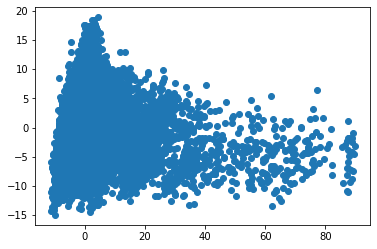

In [78]:
plt.scatter(pca_data[:,0], pca_data[:,1]);

In [79]:
pca.components_

array([[-0.00573162,  0.00721025,  0.00478074, ..., -0.0026363 ,
        -0.00649548,  0.00488926],
       [ 0.03622737,  0.08062234,  0.01422294, ...,  0.03603249,
         0.06478842, -0.02917009],
       [-0.02245903,  0.01615624, -0.04070902, ..., -0.0134918 ,
         0.00272736,  0.00763261],
       ...,
       [ 0.0140804 , -0.00975502,  0.00792829, ..., -0.57531234,
        -0.01306809, -0.002491  ],
       [ 0.00951729,  0.00921806, -0.00707432, ...,  0.08466648,
        -0.00757347,  0.01223943],
       [ 0.01472177,  0.00841824, -0.01172639, ...,  0.07376334,
        -0.00843988,  0.01117173]])

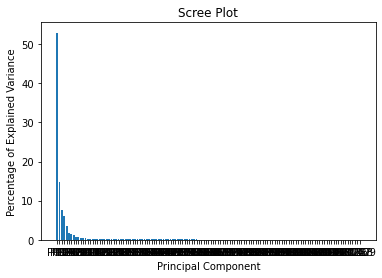

In [77]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()